# Prédiction des maladies rénales chroniques

Le jeu de données que vous allez manipuler dans cet atelier concerne 400 patients dont une partie souffre de problème de maladie rénale. 24 attributs décrivent ce jeu de données. 


Une description complète du jeu de données se trouve sur l'archive UCI : https://archive.ics.uci.edu/ml/datasets/chronic_kidney_diseaseUCI

<span style="color: red;">Le travail demandé consiste à répondre aux différentes questions de ce notebook en python si possible en utilisant une couleur. </span>


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [173]:
df = pd.read_csv('kidney_disease.csv')

<span style="color:red"> Q:  Vérifier la dimension de ce dataset  </span>

In [101]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:green"> Verification de la dimension du dataframe</span>

In [102]:
df.shape

(400, 26)

<span style="color:green"> On a donc un dataframe de 25 facteurs (colones) et 400 éléments (lignes).</span>

<span style="color:red"> Q: Pourquoi on ajoute include='all' ?</span>

<span style="color:green"> On l'ajoute afin d'avoir toutes les colones du dataset en output.</span>

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

<span style="color:red"> Q : (1) qu'est ce qu'on constate à travers cette commande ?, (2) connaissez vous une commande qui retourne un résultat similaire  ?  </span>

<span style="color:green"> 1) On constate que la commande nous retourne le nombre de valeurs non nulles pour chaque colones ainsi que le type de chacune de ces dernières. <br> <br>
2) On peut parler de la propriété dtypes qui retourne les types de données dans un dataframe.
</span>

<span style="color:red"> Q : à quoi servent les deux cellules suivantes commentées ?   </span>

In [104]:
#for col in df.columns:
#    if(df[col].dtypes =='object'):
#       print(df[col].value_counts())
#       print('-------')

<span style="color:green"> La cellule ci dessus affiche le nombre de valeurs pour chaque colone ayant des valeurs de type "object".</span>

In [174]:
df= df.apply(lambda x: x.str.replace("\t", "") if x.dtype == "object" else x)
df= df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

<span style="color:green"> La première ligne de la cellule ci dessus va redefinir le dataframe en retirant la tabulation dans les colones de types "object". <br><br>
La deuxième ligne supprime les espaces en debut et fin de chaines de caractères s'il y en a pour chaque colones de types "object".
</span>

In [175]:
#df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
#df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
#df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
#df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

<span style="color:red"> Q: Proposer la même transformation que celle de la cellule 5 en utilsant LabelEncoder et OneHotEncoder ?  </span> 

In [107]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [176]:
dfLabelEncoder = df.drop(['class'],axis=1).apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype=="object" else x)
dfLabelEncoder.insert(len(dfLabelEncoder.columns.values),'class',value=df['class'])
print(dfLabelEncoder.columns.values)
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

['id' 'age' 'bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc'
 'sod' 'pot' 'hemo' 'pcv' 'wc' 'rc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'class']


In [172]:
print(dfLabelEncoder['class'].dtype)

object


In [148]:
dfOneHotEncoder = df.apply(lambda x: OneHotEncoder().fit_transform(x.to_numpy().reshape(-1, 1)) if x.dtype=="object" else x)
dfOneHotEncoder.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<span style="color:red"> Q : faites un plot des des différents analyses bi-variées et univariées 
Vous pouvez utiliser ce lien : https://seaborn.pydata.org/generated/seaborn.pairplot.html   </span>

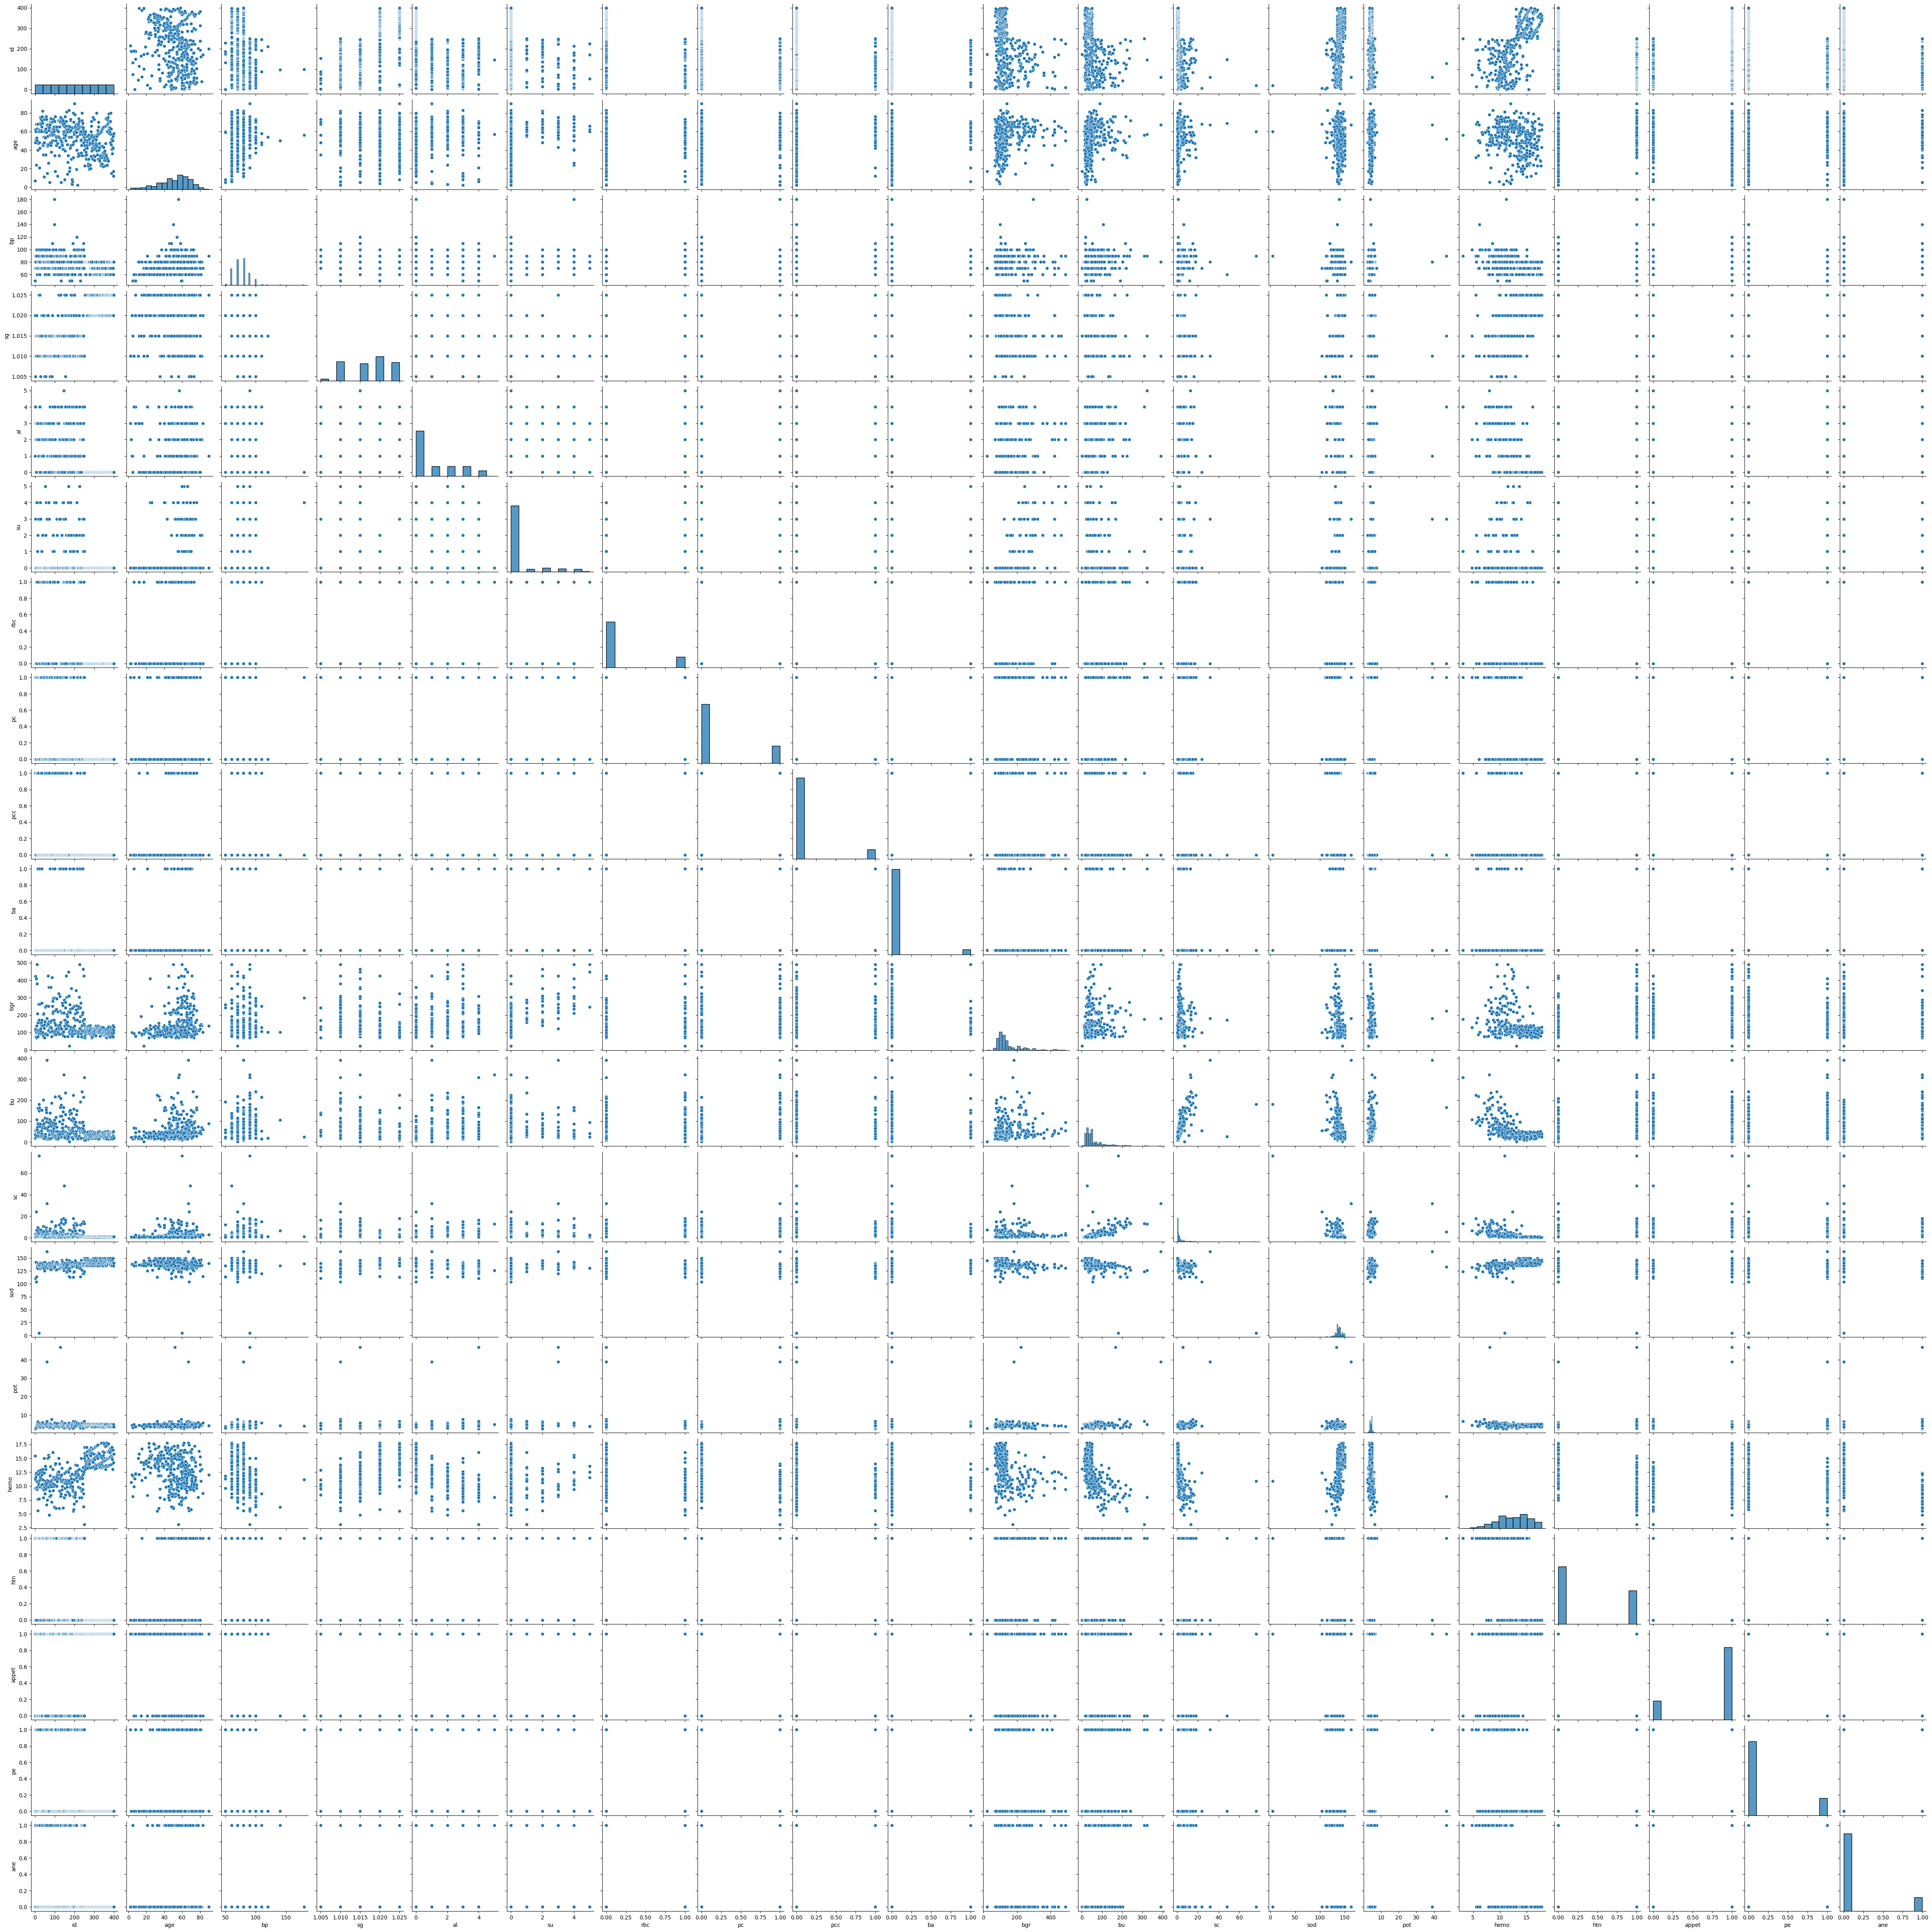

In [110]:
sns.pairplot(df)


<span style="color:red"> Q: que fait la commande suivante ?  </span> 

<span style="color:green">
Elle affiche une matrice de graphiques de nuage de points, un graphique par colone en abscisse et un par colone en ordonné, ce qui permet d'avoir une analyse varié et bivarié à la fois. Les colones selectionées ne sont pas de types objet.
</span>

array([[<AxesSubplot: xlabel='id', ylabel='id'>,
        <AxesSubplot: xlabel='age', ylabel='id'>,
        <AxesSubplot: xlabel='bp', ylabel='id'>,
        <AxesSubplot: xlabel='sg', ylabel='id'>,
        <AxesSubplot: xlabel='al', ylabel='id'>,
        <AxesSubplot: xlabel='su', ylabel='id'>,
        <AxesSubplot: xlabel='rbc', ylabel='id'>,
        <AxesSubplot: xlabel='pc', ylabel='id'>,
        <AxesSubplot: xlabel='pcc', ylabel='id'>,
        <AxesSubplot: xlabel='ba', ylabel='id'>,
        <AxesSubplot: xlabel='bgr', ylabel='id'>,
        <AxesSubplot: xlabel='bu', ylabel='id'>,
        <AxesSubplot: xlabel='sc', ylabel='id'>,
        <AxesSubplot: xlabel='sod', ylabel='id'>,
        <AxesSubplot: xlabel='pot', ylabel='id'>,
        <AxesSubplot: xlabel='hemo', ylabel='id'>,
        <AxesSubplot: xlabel='htn', ylabel='id'>,
        <AxesSubplot: xlabel='appet', ylabel='id'>,
        <AxesSubplot: xlabel='pe', ylabel='id'>,
        <AxesSubplot: xlabel='ane', ylabel='id'>],
      

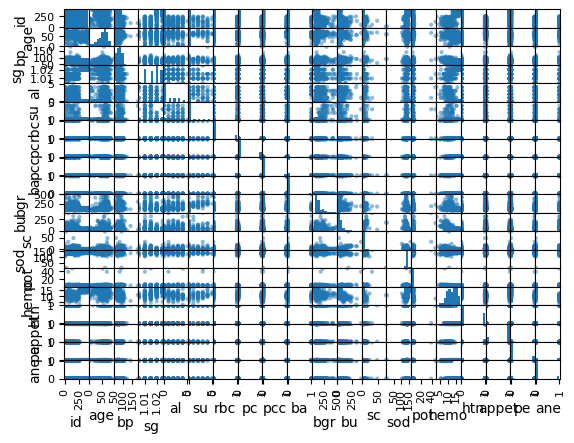

In [111]:
pd.plotting.scatter_matrix(df.select_dtypes(exclude=['object']))

In [112]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,...,330,295,270,398.000000,398.0,398.0,399.000000,399.000000,399.000000,400.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44,92,49,NaN,5.0,3.0,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41,9800,5.2,NaN,0.0,0.0,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,11,18,NaN,258.0,362.0,NaN,NaN,NaN,248.0
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,...,NaN,NaN,NaN,0.369347,NaN,NaN,0.794486,0.190476,0.150376,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,...,NaN,NaN,NaN,0.483235,NaN,NaN,0.404584,0.393170,0.357888,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN


In [177]:
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

<span style="color:red"> Q : que montrent les deux cellules suivantes </span> 

<span style="color:green">
Elles montrent qu'une fois que l'on a retiré toute les lignes avec des valeurs nulles, on a 115 valeur qui sont labélisé 0 en sortie et 43 qui sont labélisé 1. <br>
On peut dire que cet échantillon est assez faible (peu de données une fois le jeu nettoyé). 
</span>

In [178]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

<span style="color:red"> Q : écrire les données propres dans un nouveau fichier CSV que vous nommmez kideny_clean.csv </span>

In [179]:
# écrire les données propres dans un nouveau fichier CSV
df2.to_csv('Kideny2.csv')

<span style="color:red"> Question : utiliser deux autres méthodes d'imputation de données :
 - une imputation simple par la moyenne 
 - une imputation par la méthode KNN 
vous pouvez utiliser les ressources de ce lien : https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637
    
    </span>

In [180]:
df_withoutNull=dfLabelEncoder
for name in df.columns.values:
    df_withoutNull[name].fillna(df_withoutNull[name].median(), inplace = True)
df_withoutNull.isnull().sum()


id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [181]:
from sklearn.impute import KNNImputer
df_withoutNull2 =  dfLabelEncoder
imputer = KNNImputer(n_neighbors=5)
df_withoutNull2 = pd.DataFrame(imputer.fit_transform(df_withoutNull2),columns = df_withoutNull2.columns)
df_withoutNull2.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

D:\rayan\pip\ipykernel_38800\2843340252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df2.corr()
D:\rayan\pip\ipykernel_38800\2843340252.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


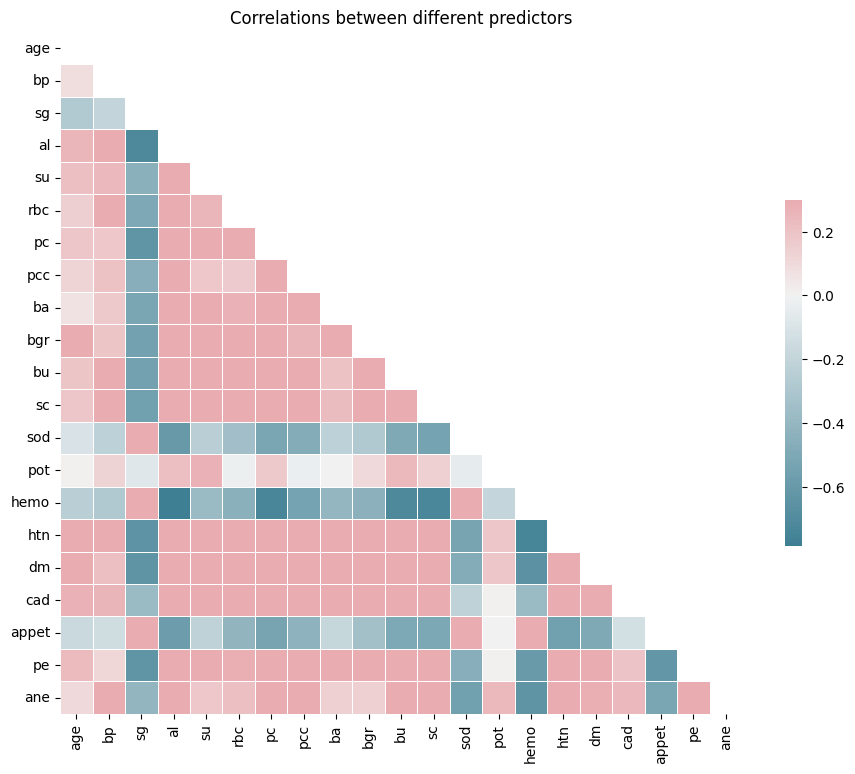

In [131]:
corr_df = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

<span style="color:red"> Q : quelles constations peut on faire sur ce correlation plot ?  </span>

<span style='color:green'>
On remarque qu'il y a plusieurs facteurs qui ont une corrélation les un avec les autres (exemple: sg-al, sg-pc,hemo-htn...) <br>
Cependant la majorité des facteurs ont une corrélation assez faibles entre eux.

</span>

<span style="color:red"> Q : faite le découpage Train/test avec 0.33 de test size, utilisez le paramètre stratif et expliquez à quoi ça sert ce paramètre </span>

In [182]:
df_withoutNull2.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,199.500000,51.562500,76.575000,1.017712,0.90000,0.395000,1.262500,0.972500,0.125000,0.075000,...,28.212500,62.252500,34.285000,0.377500,0.352500,0.095000,0.210000,0.195000,0.15500,0.625000
std,115.614301,16.982996,13.489785,0.005434,1.31313,1.040038,0.655491,0.593823,0.360138,0.299331,...,10.585721,27.906014,13.649342,0.495588,0.488713,0.310186,0.413918,0.402965,0.36921,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,20.000000,47.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,28.500000,68.500000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,...,38.000000,90.000000,49.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,2.000000,2.000000,2.000000,...,43.000000,90.000000,49.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000


In [136]:
X_train, X_test, y_train, y_test = train_test_split(df_withoutNull2.drop(['class'],axis=1),df_withoutNull2['class'], test_size=0.33, random_state= 0)

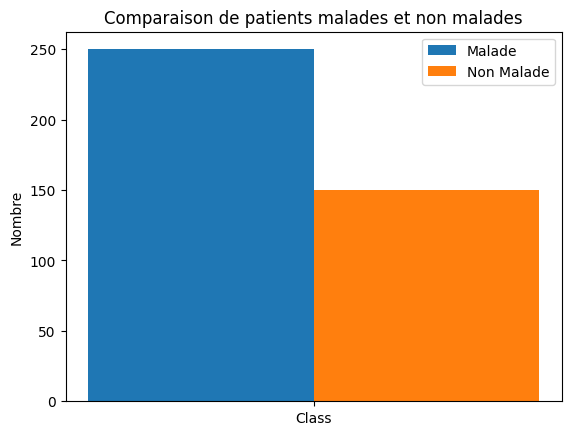

In [184]:
#affichage des survivants par moyenne de prix de billet 
X = ['Class']

X_axis = np.arange(1)
  
plt.bar(X_axis - 0.2, len(df_withoutNull2[df_withoutNull2['class']==1]['class']), 0.4, label = 'Malade')
plt.bar(X_axis + 0.2, len(df_withoutNull2[df_withoutNull2['class']==0]['class']), 0.4, label = 'Non Malade')
  
plt.xticks(X_axis, X)
plt.ylabel("Nombre")
plt.title("Comparaison de patients malades et non malades")
plt.legend()

<span style="color:red"> Q : est ce que le dataset souffre de problème de déséquilivre ? </span> 

<span style='color:green'>
On remarque sur l'histogramme ci dessus que notre dataset possède environ 1.65 fois plus de class 1 (malade) que de class 0 (non malade),
<br> ainsi on peut dire que le dataset est déséquilibré.
</span>

<span style="color:red"> 
Question : 
(1) Comparer les résultats de trois méthodes de classification en Appliquan un K-cross Validation pour chaque méthode (avec K de votre choix (max 10).  
    
        - la méthode régression logistique 
        - la méthode d'arbre de décision 
        - la méthode Naive Bayesian 
        - la méthode SVM
        - la méthode de Random Forest ( sans Grid Search strategy) 

(2) Afficher un rapport des résultats et donner une explication de ce que vous comprenez de chaque méthode demandée. 
(3) Dresser une conclusion de ce travail. 
    </span>

### Logistic Regression

<span style="color:red"> il faut compléter ici le nécessaire,

In [ ]:

print('Classification Report for Logistic Regression ', classification_report(y_test_LR, y_pred_LR))

NameError: name 'y_test_LR' is not defined

### Arbre de décision

<span style="color:red">  Une fois que vous avez votre modèle, afficher l arbre de décision que vous obtenez et expliquez le  </span> 

In [ ]:
from sklearn.tree import export_graphviz
dot1 = export_graphviz(classDecAr, out_file="arbre.dot")

### Naives Bayesian

In [ ]:
print('Classification Report for Naives Bayesian ', classification_report(y_train, y_predic_train))

### Support Vector Machine (SVM)

### KNN ( K Nearest Neighbors) 

### Random Forest 